In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import k_means
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import data
import tensorflow as tf
from tensorflow import keras
import cv2
import os
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.layers import Conv2D,MaxPooling2D
import zipfile
import torch
import torch.nn as nn
import librosa
from torch.optim import Adam


In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 97% 144M/149M [00:04<00:00, 42.3MB/s]
100% 149M/149M [00:04<00:00, 35.6MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/brain-tumor-mri-dataset.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
train_data_dir = "/content/Training"
validation_data_dir = "/content/Testing"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip= True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode= "grayscale",
    target_size=(48,48),
    batch_size = 32,
    class_mode = "categorical",
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode= "grayscale",
    target_size=(48,48),
    batch_size = 32,
    class_mode = "categorical",
    shuffle=True
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
class_label = ['glioma','meningioma','notumor','pituitary']

In [ ]:
len(class_label)

4

In [ ]:
img,label = train_generator.__next__()

In [ ]:
print(img)

[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.02299682]
   ...
   [0.03409588]
   [0.01550922]
   [0.0083666 ]]

  [[0.        ]
   [0.        ]
   [0.03260116]
   ...
   [0.03483467]
   [0.00886006]
   [0.01206058]]

  [[0.        ]
   [0.        ]
   [0.04220549]
   ...
   [0.03278001]
   [0.0022109 ]
   [0.01575456]]

  ...

  [[0.04726367]
   [0.00073697]
   [0.0

In [ ]:
#("Check Some Image of BrainTumor Using Matplotlib")

import matplotlib.pyplot as plt
# First we creating image for glioma tumor
plt.title("GLIOMA")
img = cv2.imread("/content/braintumorfive.jpg")
#glioma=np.reshape(img,(512,512))
plt.plot(img)
plt.show()


In [ ]:
Dropout,
# Create a cnn model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(48,48,1)))
model.add(Dropout(0.1))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(4,activation="relu"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                      

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
train_path = "/content/Training"
test_path = "/content/Testing"

In [ ]:
num_train_imgs = 0

for root,dirs,files in os.walk(train_path):
  num_train_imgs+=len(files)

num_test_imgs = 0

for root,dirs,files in os.walk(test_path):
  num_test_imgs+=len(files)

In [ ]:
print(num_train_imgs)

5712


In [ ]:
history=model.fit(train_generator,steps_per_epoch=num_train_imgs//32,epochs=2
                  ,torvalidation_data=validation_genera,validation_steps=num_test_imgs//32)

Epoch 1/2
178/178 [==============================] - 120s 674ms/step - loss: nan - accuracy: 0.2313 - val_loss: nan - val_accuracy: 0.2313
Epoch 2/2
178/178 [==============================] - 127s 711ms/step - loss: nan - accuracy: 0.2315 - val_loss: nan - val_accuracy: 0.2281


<Axes: >

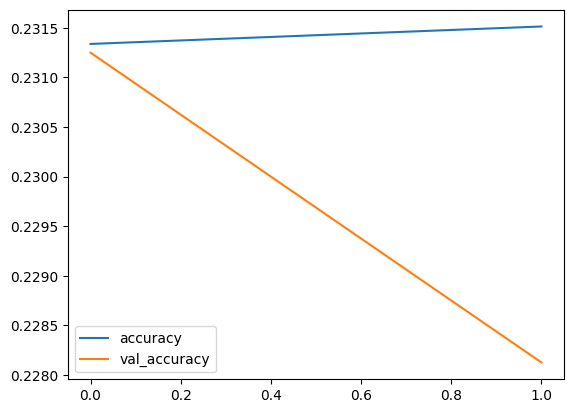

In [ ]:
history_df = pd.DataFrame(history.history)
#history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
model.save("model_file.h8")

1/1 [==============================] - 0s 113ms/step
0


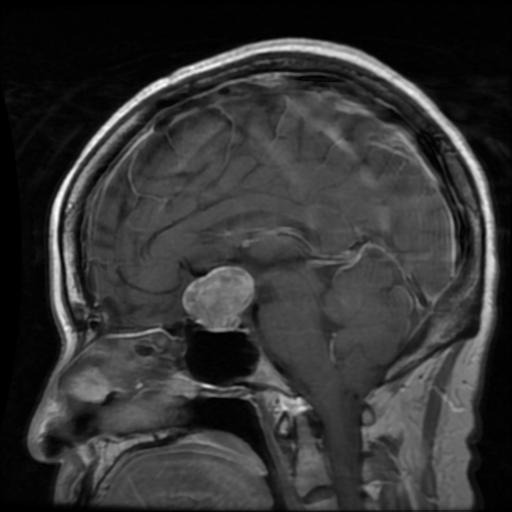

In [ ]:
#TEST OUR DATASET

import numpy as np
import pandas as pd
import os
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
#import winsound

model = load_model("/content/model_file.h8")

faceDetect = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt (1).xml')

labels_dict = {0:'glioma',0:'meningioma',0:'notumor',0:'pituitary'}

frame = cv2.imread("/content/Testing/pituitary/Te-piTr_0008.jpg")

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)


#sub_face_img = gray[y:y+h, x:x+w]
resized = cv2.resize(gray,(48,48))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,48,48,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]
print(label)
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()